In [1]:
# mengimport libary yang di butuhkan

import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# mengubah bentuk string dari Tanggal ke dalam bentuk datetime

def parser(x):
    return datetime.strptime(x,'%d') # menuliskan bahwa data yang saat ini adalah date

In [3]:
# mengimport data berdasarkan format dari csv yang di pisahkan semicolon
# dan menjadikan kolom Tanggal sebagai index
# parse_date menjelaskan kolom mana yang menjadi tanggal di data tersebut

data = pd.read_csv('Cuaca_Juli_2020.csv',sep = ';',index_col=0, parse_dates=[0] ,date_parser = parser)

In [4]:
#menampilkan 45 row pertama dari data
data.head(5)

,Suhu
Tanggal,
1900-01-01,24
1900-01-02,25
1900-01-03,25
1900-01-04,25
1900-01-05,24


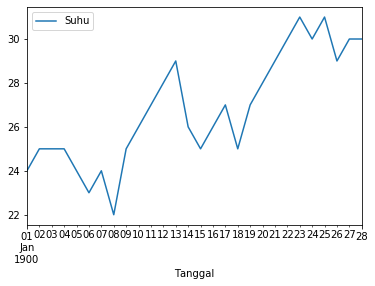

In [5]:
#menampilkan plot dari data
data.plot()

In [6]:
#data_diff digunakan untuk mengurangi data sebelumnya satu persatu (integrated order 1)
#akan digunakan nanti di arima sebagai d
data_diff = data.diff(periods = 1)

#data_diff[1:] digunakan untuk membuang nan pada data pertama
data_diff = data_diff[1:]
data_diff.head()

,Suhu
Tanggal,
1900-01-02,1.0
1900-01-03,0.0
1900-01-04,0.0
1900-01-05,-1.0
1900-01-06,-1.0


In [7]:
# setelah ini kita akan mencari tahu bahwa data ini stationary atau tidak
# stationary adalah dimana mean, variance dan covariance konstan terhadap waktu
# disuatu periode waktu semua meannya sama

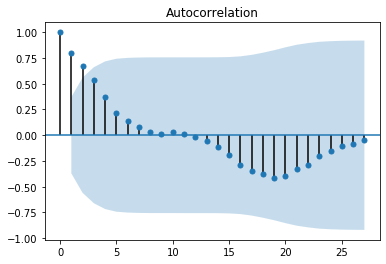

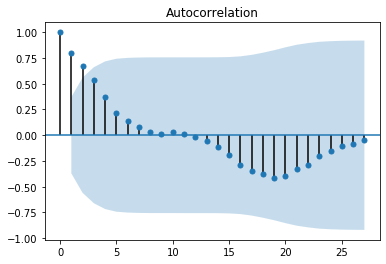

In [8]:
#menampilkan graphic autocorrelation
#grafik menunjukan data semakin kecil yang berarti tidak stationary karena ada trend

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)

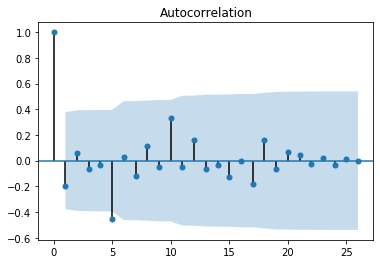

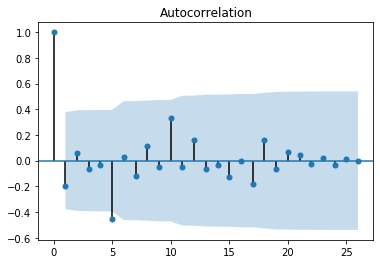

In [9]:
# disini data sudah terlihat sebagai data stationary
plot_acf(data_diff)

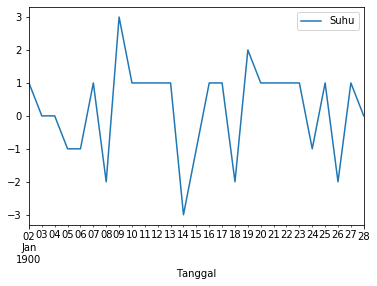

In [10]:
#
data_diff.plot()

In [11]:
#mengambil suhu dari data
X = data.values
X.size

28

In [12]:
#memecah data untuk digunakan sebagai tes perbandingan nantinya
train = X[0:21]
test = X[21:]
test.size

7

# Autoreggresive Model

In [13]:
#mengimport libary dari AR
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

#menjalankan AR pada train
model_artest = AR(train)
model_ar_fittest = model_artest.fit()

In [14]:
#memprediksi berdasarkan data train
predictions_test = model_ar_fittest.predict(start=21,end=29)

In [15]:
#menggabungkan data train dan prediksi
ar_testgoal = np.concatenate((train, predictions_test), axis = None)

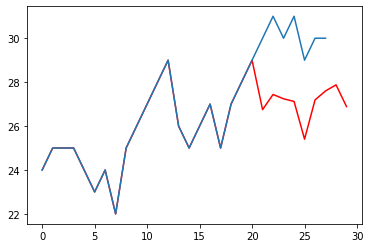

In [16]:
#menampilkan data asli berserta prediksi
plt.plot(ar_testgoal, color = 'red')
plt.plot(X)


In [17]:
# kali ini kita menggunakan data aslinya sebagai bahan pertimbangan
model_ar = AR(X)
model_ar_fit = model_ar.fit()

In [18]:
# kita akan memeprediksi dari tanggal 29 sampai 39 (10 hari)
predictions_ar = model_ar_fit.predict(start=28,end=38)

In [19]:
# menggabungkan hasil prediksi kita dengan data awal
ar_goal = np.concatenate((X, predictions_ar), axis = None)

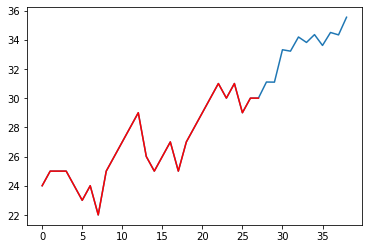

In [20]:
#menampilkan data hasil gabungan prediksi dan wal
plt.plot(ar_goal)
plt.plot(X, color= 'red')



In [21]:
# ini adalah data dari prediksi menggunakan AR
# yang kita butuhkan hanyalah 3 data pertama 
# tanggal 29 : 31.10268156
# tanggal 30 : 31.09482315
# tanggal 31 : 33.31349727

predictions_ar

array([31.10268156, 31.09482315, 33.31349727, 33.21792786, 34.18767262,
       33.81403407, 34.35056097, 33.60859264, 34.49673619, 34.33214847,
       35.54021757])

# Metode ARIMA 

In [22]:
#digunakan untuk mempprediksi semua kemungkinan pdq 
#p = periode yang digunakan untuk menganalisa
#d = selisih ( bisa dilihat dari diff sebelumnya)
#q = moving average

import itertools
p=d=q=range(0,10)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 0, 8),
 (0, 0, 9),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3, 9),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 4, 7),
 (0, 4, 8),
 (0, 4, 9),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 5, 7),
 (0, 5, 8),
 (0, 5, 9),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (0, 6, 7),
 (0, 6, 8),
 (0, 6, 9),
 (0, 7, 0),
 (0, 7, 1),
 (0, 7, 2),
 (0, 7, 3),
 (0, 7, 4),
 (0, 7, 5),
 (0, 7, 6),
 (0, 7, 7),
 (0, 7, 8),
 (0, 7, 9),
 (0, 8, 0),
 (0, 8, 1),
 (0, 8, 2),
 (0,

In [23]:
#menimport library dan menjalankan prediksi arima terhadap data train
# dan menggunakan order yang menghasilkan RRS paling kecil

from statsmodels.tsa.arima_model import ARIMA
model_testarima = ARIMA(train,order = (5,1,1))
model_fitarima = model_testarima.fit()
print(model_fitarima.aic)

73.4508558968715


In [24]:
#menampilkan prediksi 10 hari sesudah data awal
predictions_testarima = model_fitarima.forecast(steps=10)[0]
predictions_testarima

array([28.63200818, 29.7600298 , 29.04590978, 28.59367494, 28.22641025,
       28.74143993, 28.69160084, 29.51029815, 30.28667839, 30.95753702])

In [25]:
#menggabungkan hasil prediksi dari training data dan data asli sebagai perbandingaN
goaltest = np.concatenate((train, predictions_testarima), axis = None)

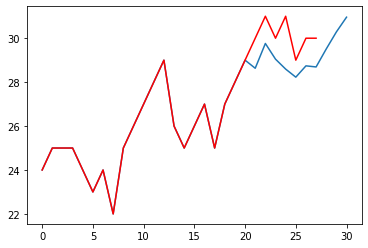

In [26]:
# hasil untuk membadingkan hasil prediksi dengan data aslinya
plt.plot(goaltest)
plt.plot(X,color='red')

In [27]:
#ini digunakan untuk mencari RSS yang paling kecil dengan melakukan pengulangan
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model = ARIMA(X,order = param)
        model_fit = model.fit()
        print(model_fit.aic)
        print(param,model_fit.aic)
    except:
        continue

134.9494237039258
(0, 0, 0) 134.9494237039258
120.55902307408532
(0, 0, 1) 120.55902307408532
113.88830050479086
(0, 0, 2) 113.88830050479086
112.68940443948176
(0, 0, 3) 112.68940443948176
108.34407459250563
(0, 0, 4) 108.34407459250563
112.34461497689323
(0, 0, 5) 112.34461497689323
113.21569999834196
(0, 0, 6) 113.21569999834196
112.54793224633895
(0, 0, 7) 112.54793224633895
114.40063068246691
(0, 0, 8) 114.40063068246691
115.4135789096252
(0, 0, 9) 115.4135789096252
97.61732767974594
(0, 1, 0) 97.61732767974594
98.58399962060513
(0, 1, 1) 98.58399962060513
100.56117503455692
(0, 1, 2) 100.56117503455692
98.52347597785338
(0, 1, 3) 98.52347597785338
99.53371496556018
(0, 1, 4) 99.53371496556018
117.75658214702398
(0, 2, 0) 117.75658214702398
100.41927138063983
(0, 2, 1) 100.41927138063983
103.23144894421563
(1, 0, 0) 103.23144894421563
104.9841650618508
(1, 0, 1) 104.9841650618508
106.5590782797001
(1, 0, 2) 106.5590782797001
107.76426858779834
(1, 0, 3) 107.76426858779834
109.2599

In [28]:
#setelah mendapatkan RSS paling kecil lalu kita masukan ke dalam order
#lagi kita menjalankan arima untuk data aslinya

model = ARIMA(X,order = (5,1,1))
model_fit = model.fit()
print(model_fit.aic)

92.42304528129736


In [29]:
#menampilkan prediksi untuk 10 hari kedepan
predictions = model_fit.forecast(steps=10)[0]

In [30]:
#menggabungkan hasil prediksi dengan data awal
goal = np.concatenate((X, predictions), axis = None)

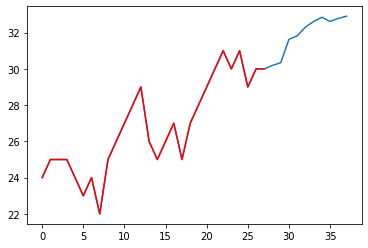

In [31]:
#menampilkan hasil dari prediksi 
plt.plot(goal)
plt.plot(X,color='red')

In [32]:
# ini adalah data dari prediksi menggunakan AR
# yang kita butuhkan hanyalah 3 data pertama 
# tanggal 29 : 30.19262905
# tanggal 30 : 30.33919401
# tanggal 31 : 31.62847663

predictions

array([30.19262905, 30.33919401, 31.62847663, 31.82050289, 32.30376381,
       32.61402052, 32.84605322, 32.61422582, 32.7843486 , 32.90269673])

In [36]:
goal

array([24.        , 25.        , 25.        , 25.        , 24.        ,
       23.        , 24.        , 22.        , 25.        , 26.        ,
       27.        , 28.        , 29.        , 26.        , 25.        ,
       26.        , 27.        , 25.        , 27.        , 28.        ,
       29.        , 30.        , 31.        , 30.        , 31.        ,
       29.        , 30.        , 30.        , 30.19262905, 30.33919401,
       31.62847663, 31.82050289, 32.30376381, 32.61402052, 32.84605322,
       32.61422582, 32.7843486 , 32.90269673])

SyntaxError: invalid syntax (<ipython-input-48-4b2bf160bec1>, line 3)